In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [7]:
# drop month, day and year

df.drop(['day', 'month', 'year'], axis = 1, inplace=True)

In [8]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [9]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [10]:
# Encoding
df['Classes'] = np.where(df['Classes'].str.contains("not fire"), 0, 1)

In [11]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [12]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [14]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [ ]:
# Independent and Dependent features

# Remove the column 'FWI' from the dataset and store remaining columns as input features (X)
X = df.drop('FWI', axis=1)

# Select the column 'FWI' as the target/output variable (y)
y = df['FWI']

In [16]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [17]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [18]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.5, random_state=42)

In [19]:
X_train.shape, X_test.shape

((121, 11), (122, 11))

In [20]:
# Feature Selection based on correlation

X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.629548,-0.275032,-0.334468,0.692928,0.526955,0.408943,0.610875,0.497731,0.546105,0.235690
RH,-0.629548,1.000000,0.218804,0.238679,-0.633760,-0.401741,-0.210469,-0.713804,-0.342890,-0.449932,-0.400363
Ws,-0.275032,0.218804,1.000000,0.276468,-0.159436,-0.003823,0.074557,-0.029568,0.028324,-0.100804,-0.189989
Rain,-0.334468,0.238679,0.276468,1.000000,-0.553689,-0.290332,-0.306338,-0.354670,-0.300936,-0.410625,-0.072397
FFMC,0.692928,-0.633760,-0.159436,-0.553689,1.000000,0.618557,0.523767,0.740955,0.602701,0.788668,0.221144
DMC,0.526955,-0.401741,-0.003823,-0.290332,0.618557,1.000000,0.883339,0.662162,0.984718,0.623561,0.177626
DC,0.408943,-0.210469,0.074557,-0.306338,0.523767,0.883339,1.000000,0.480589,0.949195,0.572174,-0.076725
ISI,0.610875,-0.713804,-0.029568,-0.354670,0.740955,0.662162,0.480589,1.000000,0.614249,0.724488,0.269873
BUI,0.497731,-0.342890,0.028324,-0.300936,0.602701,0.984718,0.949195,0.614249,1.000000,0.623985,0.083489
Classes,0.546105,-0.449932,-0.100804,-0.410625,0.788668,0.623561,0.572174,0.724488,0.623985,1.000000,0.155307


<Axes: >

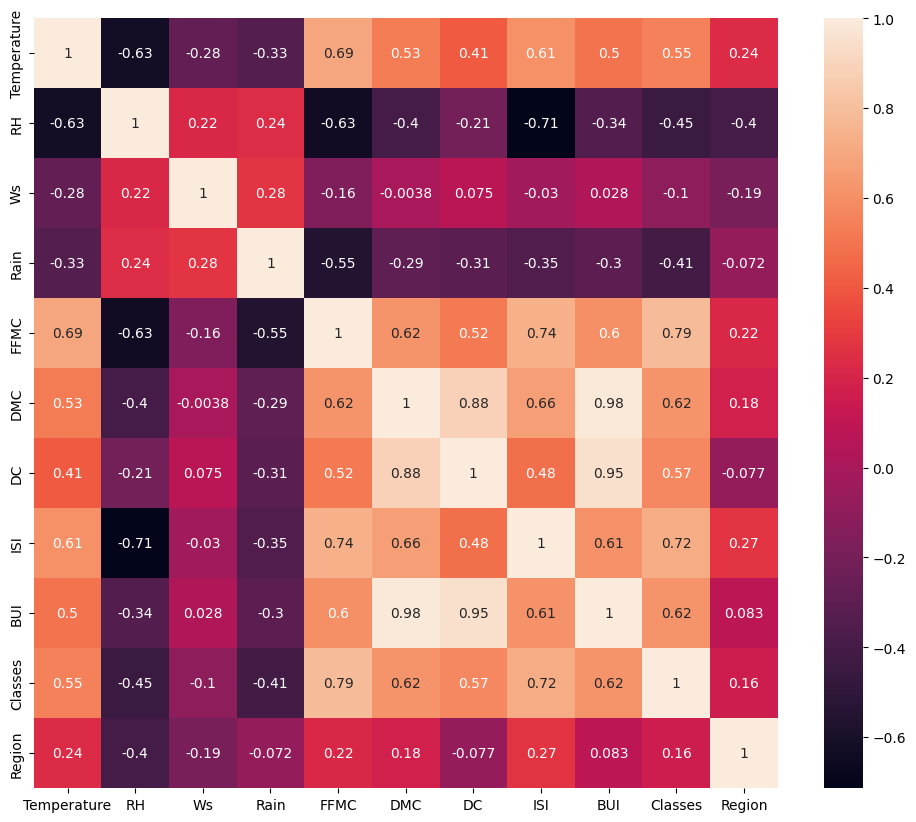

In [21]:
# check for multicollinearity

plt.figure(figsize = (12, 10))
corr = X_train.corr()
sns.heatmap(corr, annot=True)

In [ ]:
def correlation(dataset, threshold):
    # Create an empty set to store names of highly correlated columns
    col_corr = set()

    # Calculate correlation matrix of the dataset
    corr_matrix = dataset.corr()

    # Loop over all columns using index i
    for i in range(len(corr_matrix.columns)):

        # Loop over columns before i (to avoid duplicate checking)
        for j in range(i):

            # Check if absolute correlation value is greater than threshold
            if abs(corr_matrix.iloc[i, j]) > threshold:

                # Get the name of the column that is highly correlated
                colname = corr_matrix.columns[i]

                # Add this column name to the set
                col_corr.add(colname)

    # Return the set of highly correlated column names
    return col_corr

In [26]:
# threshold d--domain expertise
corr_features = correlation(X_train, 0.85)

In [ ]:
# Drop features when correlation is more than 0.85

# Remove highly correlated features from training data
X_train.drop(corr_features, axis=1, inplace=True)

# Remove the same correlated features from testing data
X_test.drop(corr_features, axis=1, inplace=True)

# Display the shape of X_train and X_test after dropping columns
X_train.shape, X_test.shape

((121, 9), (122, 9))

### **Feature Scaling or Standardization**

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [29]:
X_train_scaled

array([[ 0.85337191,  0.03263708,  0.93160102, ..., -0.43837123,
        -1.11388543, -1.02510851],
       [ 0.0424452 , -0.56976592, -0.6072894 , ...,  0.0786621 ,
         0.8977584 ,  0.97550649],
       [ 1.12368082, -1.23910258, -0.6072894 , ..., -0.62638335,
        -1.11388543, -1.02510851],
       ...,
       [-1.84971713,  0.83584107,  0.54687842, ..., -1.04941062,
        -1.11388543, -1.02510851],
       [ 0.58306301, -0.30203125,  0.16215581, ...,  0.64269845,
         0.8977584 ,  0.97550649],
       [-0.49817261,  0.90277473,  2.08576884, ..., -0.83789698,
        -1.11388543, -1.02510851]], shape=(121, 9))

### **Box plots to under Effect of Standard Scaler**

Text(0.5, 1.0, 'X_train After Scaling')

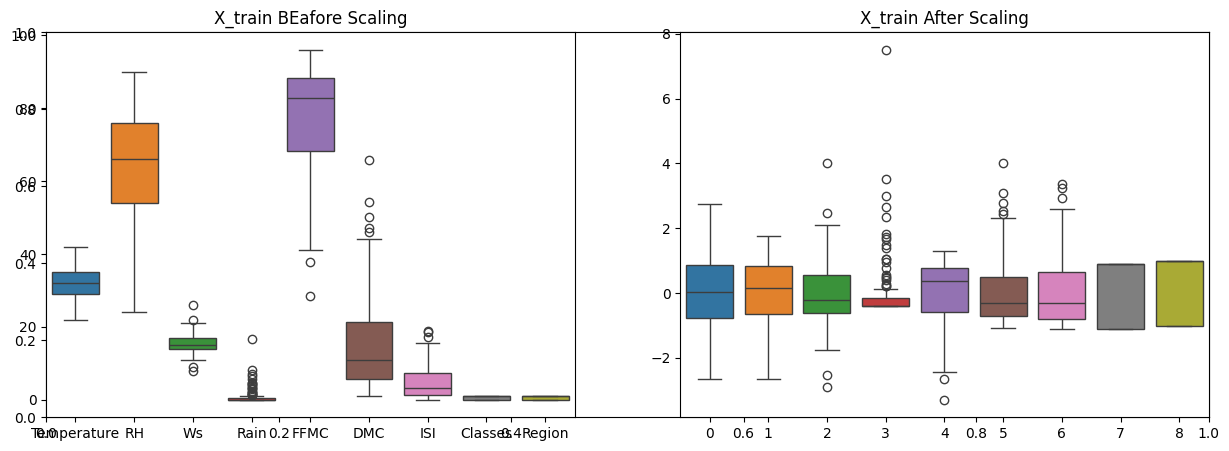

In [ ]:
# Create a figure with width 15 inches and height 5 inches
plt.subplots(figsize=(15, 5))

# Create the first subplot (1 row, 2 columns, position 1)
plt.subplot(1, 2, 1)

# Draw boxplot for X_train (before scaling)
sns.boxplot(data=X_train)

# Set title for first subplot
plt.title('X_train Before Scaling')

# Create the second subplot (1 row, 2 columns, position 2)
plt.subplot(1, 2, 2)

# Draw boxplot for X_train after scaling
sns.boxplot(data=X_train_scaled)

# Set title for second subplot
plt.title('X_train After Scaling')